<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/SepsisMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('feature_combined.csv')

In [ ]:
df.head().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
X_0,1.500000,2.227147,4.000000,0.000000,4.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,2.227147,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
X_1,140.000000,140.000000,140.000000,138.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,141.000000,141.000000,141.000000,141.000000,140.000000,140.000000,140.000000,140.000000,140.000000,141.000000
X_2,138.000000,138.250000,138.500000,138.000000,138.500000,139.000000,139.000000,139.000000,139.000000,139.000000,139.750000,140.250000,140.250000,140.250000,140.000000,140.000000,140.000000,140.000000,140.000000,140.250000
X_3,137.000000,137.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
X_4,1.414214,1.129338,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.129338,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_103,0.015385,0.006593,-0.001099,-0.027473,-0.037363,-0.065934,-0.095604,-0.110989,-0.126374,-0.121978,-0.034066,0.018681,0.094505,0.078022,0.053846,0.054945,0.028571,0.045055,0.024176,-0.014286
X_104,0.650444,0.650444,0.776250,1.235168,1.281025,1.724633,2.323238,2.544476,2.780426,2.752621,3.841407,4.222953,4.717670,4.838415,5.010246,5.008966,5.039587,5.058631,5.010246,4.827804
offset,-660.000000,-655.000000,-650.000000,-645.000000,-640.000000,-635.000000,-630.000000,-625.000000,-620.000000,-615.000000,-610.000000,-605.000000,-600.000000,-595.000000,-590.000000,-585.000000,-580.000000,-575.000000,-570.000000,-565.000000
id,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 65.8 MB


In [ ]:
df.nunique()

X_0       1372
X_1        137
X_2        513
X_3        135
X_4       1841
          ... 
X_103     1147
X_104     4182
offset     133
id         600
label        2
Length: 108, dtype: int64

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
X_0,79800.0,0.155129,3.047073,-6.000000,-1.289256,0.00000,2.602498,4.000000
X_1,79800.0,89.397506,20.258613,0.000000,75.000000,88.00000,102.000000,177.000000
X_2,79800.0,87.264355,19.951703,0.000000,72.750000,85.50000,99.750000,177.000000
X_3,79800.0,85.344023,19.978456,0.000000,71.000000,84.00000,98.000000,177.000000
X_4,79800.0,0.145070,1.102048,-2.000000,-0.228728,0.00000,0.854563,2.000000
...,...,...,...,...,...,...,...,...
X_103,79800.0,0.000516,0.100430,-2.241758,-0.029670,0.00000,0.030769,2.209890
X_104,79800.0,2.405792,2.542446,0.000000,1.068188,1.83275,3.004270,50.647474
offset,79800.0,-330.000000,191.964741,-660.000000,-495.000000,-330.00000,-165.000000,0.000000
id,79800.0,300.500000,173.205925,1.000000,150.750000,300.50000,450.250000,600.000000


In [ ]:
df["label"].value_counts()

1    39900
0    39900
Name: label, dtype: int64

In [ ]:
# Create (X_train, y_train), (X_test, y_test)

as_np = df.to_numpy()

index = int(len(as_np) * .80)

X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((63840, 107), (63840,)), ((15960, 107), (15960,)))

In [ ]:
df1 = df.loc[df['offset'] == 0]

In [ ]:
df1.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_98,X_99,X_100,X_101,X_102,X_103,X_104,offset,id,label
132,-1.200000,127,125.50,124,0.000000,0.20,1.290994,-0.056816,127,124.857143,...,1.772306,19,16.923077,16,1.085143,0.028571,0.862316,0,1,1
265,4.000000,86,85.25,85,2.000000,-0.02,0.500000,-1.317901,90,86.857143,...,-0.707671,20,15.846154,13,0.634795,-0.054945,2.409915,0,2,1
398,4.000000,106,105.25,105,2.000000,0.02,0.500000,3.000000,106,105.000000,...,0.060937,32,30.307692,28,-0.722135,0.012088,1.109400,0,3,1
531,-3.109816,105,98.75,94,0.456508,-0.14,5.188127,-0.077303,105,96.285714,...,-1.039498,21,16.615385,14,0.449215,0.078022,2.433737,0,4,1
664,0.000000,77,77.00,77,0.000000,0.00,0.000000,7.000000,77,76.857143,...,1.798440,23,16.076923,11,0.845429,-0.015385,2.985005,0,5,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 132 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 510.9 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop("label", axis=1), df1["label"], test_size=0.2, random_state=42)

**Logestic Regression**

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

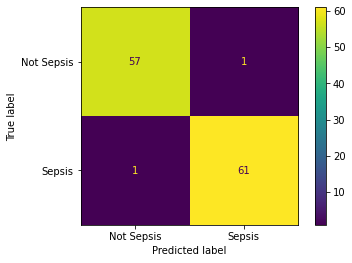

In [ ]:
# Display Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 1
True Positives: 61



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9833333333333333'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 0.9838709677419355'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.016129032258064516'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 0.9827586206896551'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9838709677419355'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9833147942157954'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9838709677419355'

In [ ]:
# Get prediction probabilities

probabilities = model.predict_proba(X_test)[:, 1]

probabilities

array([9.99806293e-01, 1.33066311e-03, 5.23930452e-08, 9.99990229e-01,
       9.93485041e-01, 8.52760252e-01, 9.99999570e-01, 9.89308958e-03,
       9.99984057e-01, 4.32230990e-04, 9.99999534e-01, 9.99975634e-01,
       9.99998760e-01, 4.66498051e-10, 5.13371077e-03, 9.52748703e-01,
       9.99999982e-01, 9.97798560e-01, 9.99466506e-01, 9.99999729e-01,
       1.00000000e+00, 4.77450902e-10, 5.40639008e-06, 1.46521759e-06,
       1.82536165e-01, 4.33886981e-11, 9.99999994e-01, 9.99873800e-01,
       2.07372961e-08, 5.42549562e-12, 4.03823377e-13, 9.99927936e-01,
       9.99999600e-01, 9.47124821e-01, 9.95041209e-01, 5.40860748e-04,
       9.99999987e-01, 8.36694870e-15, 1.31850811e-03, 9.99995916e-01,
       8.94212317e-02, 9.99999884e-01, 2.97493975e-06, 1.13087429e-08,
       9.99999835e-01, 9.83957684e-01, 8.65762200e-09, 9.99941815e-01,
       9.99999986e-01, 5.68326142e-08, 9.15274679e-01, 9.52979933e-01,
       9.99995526e-01, 1.19593345e-08, 9.88100389e-08, 4.91936708e-04,
      

In [ ]:
# Get predictions using normal threshold of 0.5

pd.value_counts(probabilities > 0.5)

True     62
False    58
dtype: int64

In [ ]:
# Generate 2000 evenly-separated thresholds

import numpy as np

thresholds = np.linspace(0, 1, num=2000).astype(np.float16)

thresholds

array([0.000e+00, 5.002e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
       1.000e+00], dtype=float16)

In [ ]:
# Get test predictions array for each threshold

all_predictions = np.array([(probabilities > t).astype(int) for t in thresholds])

all_predictions.shape

(2000, 120)

In [ ]:
# Show distribution depending on threshold

pd.value_counts(all_predictions[0])

1    120
dtype: int64

In [ ]:
# Get confusion matrices, true positive rates, and false positive rates for each threshold

confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
# Create Scatter Plot of ROC Curve

import plotly.express as px

px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROC Curve')

In [ ]:
# Accuracy on Train
print("Training Accuracy is: ", logreg.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", logreg.score(X_test, y_test))

Training Accuracy is:  0.9583333333333334
Testing Accuracy is:  0.9833333333333333


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

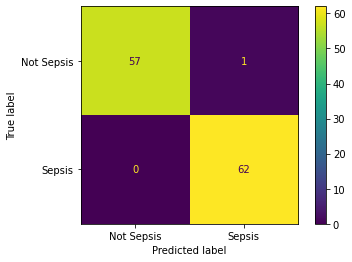

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

In [ ]:
print("Training Accuracy is: ", knn.score(X_train, y_train))

print("Testing Accuracy is: ", knn.score(X_test, y_test))

Training Accuracy is:  0.9875
Testing Accuracy is:  0.9833333333333333


**Random Forest**

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

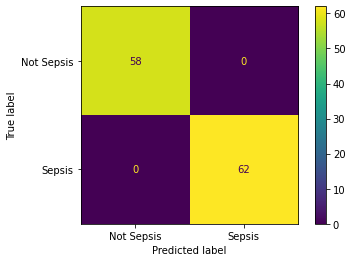

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 58
False Positives: 0
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 1.0'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 1.0'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.0'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 1.0'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 1.0'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 1.0'

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 58
False Positives: 0
False Negatives: 0
True Positives: 62



**MLP**

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

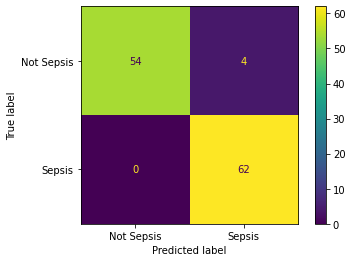

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 54
False Positives: 4
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9666666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9310344827586207'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.06896551724137931'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9393939393939394'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9655172413793103'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.96875'